# Overview of how my time is spent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gspread

Import csv file from Google sheets and drop rows before today

In [2]:
trackData = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTzosEj_RfJEZgoC6h7AinJc0znDN5eIRzg9bADDJs9jS8Z84WLLhmjG_TPTozRjpX_M_nzEIfEnyfL/pub?gid=1401161070&single=true&output=csv",index_col=0)

In [3]:
trackData = trackData[trackData['dayBegin'].notna()]

In [4]:
trackData.head()

,day,dayBegin,dayEnd,hoursLived,sustainHours,armyHours,workHours,chillHours,workoutHours,otherHours,...,weightDifference,happinessScore,mo,chillType,chillHoursByType,bookTitleTwo,pagesReadTwo,prevPageTwo,currPageTwo,pageReadTotal
2020.10.12,1,6.5,22.75,16.25,3.0,4.5,2.50,3.0,1.00,1.0,...,0.1,6.0,0.0,"skype,chat","0.5,1",a little life,9,624.0,633.0,19
2020.10.13,2,6.5,22.75,16.25,3.5,5.0,4.25,2.0,1.50,NaN,...,0.7,6.5,0.0,"hangout,survivo","1.5,0.5",a little life,12,633.0,645.0,24
2020.10.14,3,6.5,23.00,16.50,3.5,5.0,1.00,4.0,2.00,0.5,...,-0.5,7.5,1.5,"Youtube,survivo","2,1.5",a little life,0,645.0,645.0,18
2020.10.15,4,6.5,22.50,16.00,3.5,5.0,4.25,1.0,1.25,0.5,...,0.7,7.5,1.0,"guitar,youtube,survivo","0.5,0.25,0.25",a little life,17,645.0,662.0,22
2020.10.16,5,6.5,23.00,16.50,3.5,7.0,2.00,2.0,1.50,0.0,...,-0.9,7.0,0.0,"Youtube,survivo","1,1",a little life,0,662.0,662.0,0


In [5]:
trackData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 2020.10.12 to 2020.12.13
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   day               55 non-null     int64  
 1   dayBegin          55 non-null     float64
 2   dayEnd            55 non-null     float64
 3   hoursLived        55 non-null     float64
 4   sustainHours      55 non-null     float64
 5   armyHours         55 non-null     float64
 6   workHours         55 non-null     float64
 7   chillHours        55 non-null     float64
 8   workoutHours      55 non-null     float64
 9   otherHours        11 non-null     float64
 10  unknownHours      55 non-null     float64
 11  assumption        41 non-null     object 
 12  codingHours       55 non-null     float64
 13  typeOfCoding      50 non-null     object 
 14  bookTitleOne      54 non-null     object 
 15  pagesReadOne      55 non-null     int64  
 16  prevPageOne       55 non-null     

### Nutshell view history

In [6]:
avgHoursLived = trackData['hoursLived'].mean()
avgHoursArmy = trackData['armyHours'].mean()
avgHoursWorking = trackData['workHours'].mean()
avgEfficiencyScore = trackData['efficiencyScore'].mean()
avgHappinessScore = trackData['happinessScore'].mean()
avgPagesRead = trackData['pageReadTotal'].sum()
countWorkout = trackData.loc[trackData.workout == True, 'workout'].count()
countMeditation = trackData.loc[trackData.meditation == True, 'meditation'].count()

In [7]:
print("Recent",len(trackData.index),'days in a nutshell:')
print('Average number of hours lived in a day:',avgHoursLived)
print('Average number of hours spent for army:',avgHoursArmy)
print('Average number of hours spent for work:',avgHoursWorking)
print('Average efficiency score is:',avgEfficiencyScore)
print('Average happiness score is:',avgHappinessScore)
print('Number of workouts:', countWorkout)
print('Number of meditations:',countMeditation)

Recent 55 days in a nutshell:
Average number of hours lived in a day: 15.77
Average number of hours spent for army: 4.714545454545455
Average number of hours spent for work: 3.463636363636363
Average efficiency score is: 6.8
Average happiness score is: 7.265454545454546
Number of workouts: 32
Number of meditations: 23


### Nutshell view recent week

In [8]:
trackDataRecent = trackData.tail(7)

In [9]:
avgHoursLivedRecent = trackDataRecent['hoursLived'].mean()
avgHoursArmyRecent = trackDataRecent['armyHours'].mean()
avgHoursWorkingRecent = trackDataRecent['workHours'].mean()
avgEfficiencyScoreRecent = trackDataRecent['efficiencyScore'].mean()
avgHappinessScoreRecent = trackDataRecent['happinessScore'].mean()
avgPagesReadRecent = trackDataRecent['pageReadTotal'].sum()
countWorkoutRecent = trackDataRecent.loc[trackData.workout == True, 'workout'].count()
countMeditationRecent = trackDataRecent.loc[trackData.meditation == True, 'meditation'].count()

In [10]:
print("Recent week in a nutshell:")
print('Average number of hours lived in a day:',avgHoursLivedRecent)
print('Average number of hours spent for army:',avgHoursArmyRecent)
print('Average number of hours spent for work:',avgHoursWorkingRecent)
print('Average efficiency score is:',avgEfficiencyScoreRecent)
print('Average happiness score is:',avgHappinessScoreRecent)
print('Number of workouts:', countWorkoutRecent)
print('Number of meditations:',countMeditationRecent)

Recent week in a nutshell:
Average number of hours lived in a day: 15.728571428571428
Average number of hours spent for army: 4.614285714285714
Average number of hours spent for work: 3.3999999999999995
Average efficiency score is: 6.785714285714286
Average happiness score is: 7.557142857142858
Number of workouts: 3
Number of meditations: 1


### Nuthsell visualizations

In [11]:
sns.set_style('darkgrid')

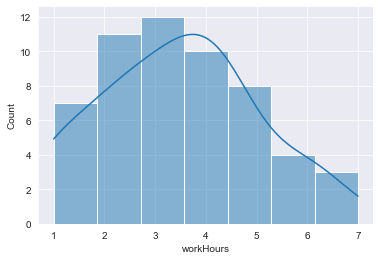

In [12]:
sns.histplot(trackData['workHours'],kde=True)

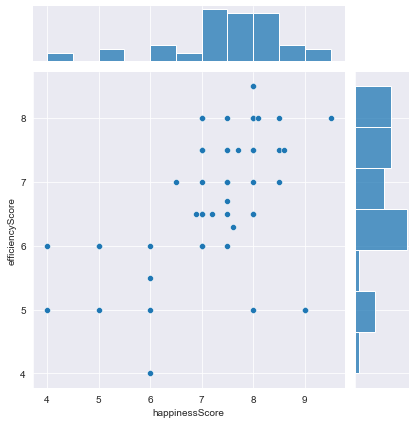

In [13]:
sns.jointplot(x='happinessScore',y='efficiencyScore',data=trackData,kind='scatter')

As we can seee in the above visualizations, it is not a good way to visualize since a lot of these recorded datas are estimates in the units of 0.5 or 0.25.
One brute force way to resolve this issue could be actually recording more precise data. But that would take too much time in real life. An alternate approach that I take is seeing the percentage of hours a certain category takes from the number of hours lived.
For example, if the number of hours lived is 16 hours and work hours is 4, it would result in 4/16 = 0.25
This would resolve the original issue and give a more realistic visualization of how much time was spent in that category.

In [14]:
trackData['armyHoursPercentage'] = trackData['armyHours']/trackData['hoursLived']
trackData['workHoursPercentage'] = trackData['workHours']/trackData['hoursLived']
trackData['chillHoursPercentage'] = trackData['chillHours']/trackData['hoursLived']

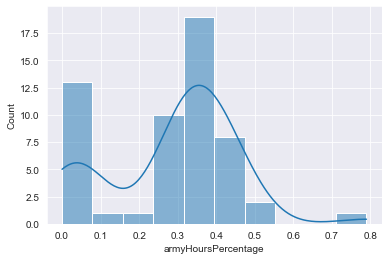

In [15]:
sns.histplot(trackData['armyHoursPercentage'],bins=10,kde=True)

The leftmost column where the amount of time spent per day on army is less than 0.1 are weekends or days off when I only have roll call.

The three columns in the middle are average weekdays with slight variations of when I finish work and the rightmost small bump is when I have night duties.

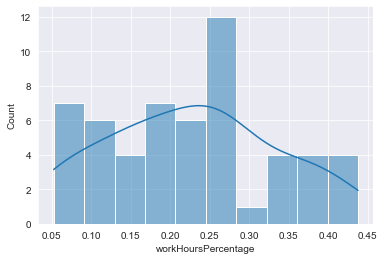

In [16]:
sns.histplot(trackData['workHoursPercentage'],bins=10,kde=True)

Work hour distribution is not as extreme as army hours. The highest column in the middle would be the case of a well busily spent weekdays. The ones to the right are week days where I worked less from reasons such as stress, working out, etc. The columns to the right are weekends and days off.

One interesting takeaway is that the amount of time spent on work does not go up that much during the weekend.
So there should be some time spent on weekend for other purposes. Maybe there is a way to distribute time in a better manner to work more during days off.

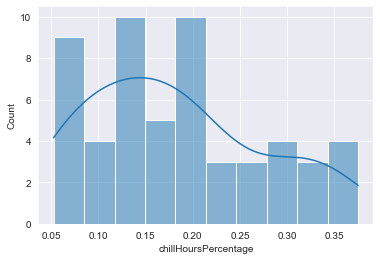

In [17]:
sns.histplot(trackData['chillHoursPercentage'],bins=10,kde=True)

Making the new percentage column 

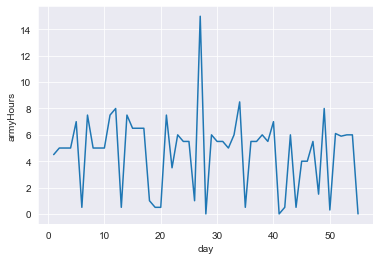

In [18]:
sns.lineplot(data=trackData, x="day", y="armyHours")

Takeaway: This simple lineplot does offer some insight.
1. The super high peek is when I have night shift duties.
2. The days where number of hours fall before 3 are days off.

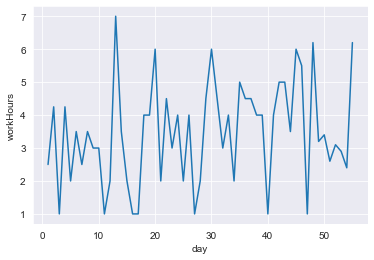

In [19]:
sns.lineplot(data=trackData, x="day", y="workHours")

Takeaway:
1. The days that have more than 5 days of work hours is weekends.
2. It is still a mystery of the plummeting work hours on some days. It could be due to certain events or simple burnouts. Events are not added in the data but could be derived from chill type column. In the other case of a burnout, the average number of chill hours for n number of days before the drop could be a cue.

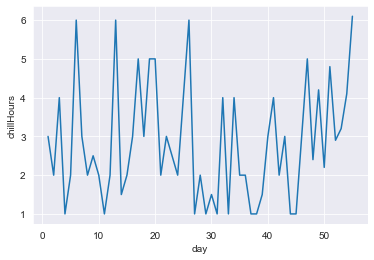

In [20]:
sns.lineplot(data=trackData, x="day", y="chillHours")

Takeaway:
    This one was easier to digest. The skyrocketing number of hours that are above 5 are all on Friday or weekends. :)

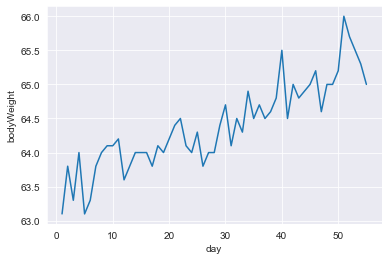

In [21]:
sns.lineplot(data=trackData, x="day", y="bodyWeight")

Takeaway: Bodyweight is increasing generally

In [22]:
# plt.scatter(trackData['armyHoursPercentage'], trackData['workHoursPercentage'])

### Does meditation and workouts matter?

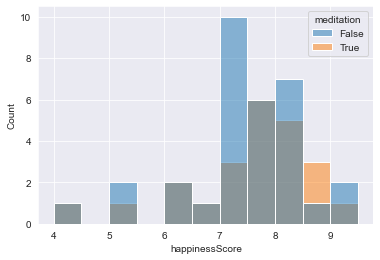

In [23]:
sns.histplot(data=trackData, x="happinessScore", hue="meditation")

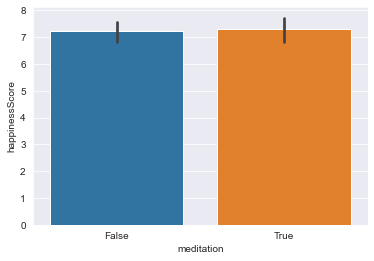

In [24]:
sns.barplot(x='meditation',y='happinessScore',data=trackData)

It looks like happiness and meditation does not have much to do with each other.

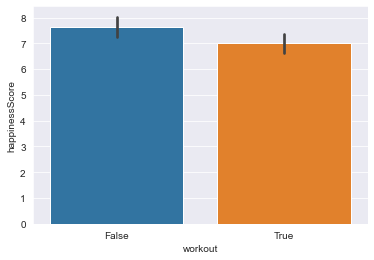

In [25]:
sns.barplot(x='workout',y='happinessScore',data=trackData)

### shocking find!
It looks like I am happier on days that I did not workout.
This could mean that workout makes me unhappy or I workout when I get stressed.
I think the latter would make more sense

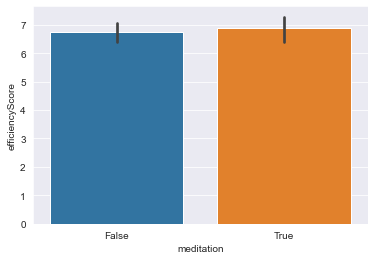

In [26]:
sns.barplot(x='meditation',y='efficiencyScore',data=trackData)

Meditation and effieciency does not seem to have much to do with each other

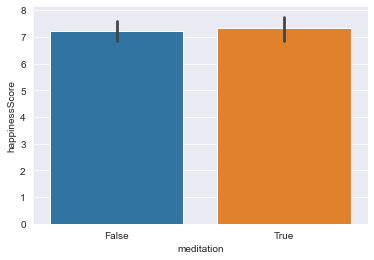

In [27]:
sns.barplot(x='meditation',y='happinessScore',data=trackData)

At this point I am unsure if meditation helps me at all!
It doesn't make me happy neither efficient.
But I think it does help me feel better when I am really stressed.
So maybe that is why the average is similar. 
If I am a bit more efficient and happier on days that I meditated it is also the worst days that I meditate as well.
These worst days probably have very low efficiency and happiness so it cancels out the positive effect.

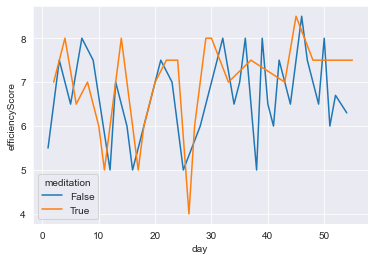

In [28]:
sns.lineplot(data=trackData, x="day", y="efficiencyScore",hue='meditation')

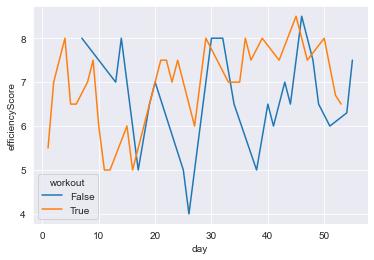

In [29]:
sns.lineplot(data=trackData, x="day", y="efficiencyScore",hue='workout')

### Correlation between variables

In [30]:
trackData[['efficiencyScore','happinessScore']].corr()

,efficiencyScore,happinessScore
efficiencyScore,1.000000,0.469602
happinessScore,0.469602,1.000000


The correlation matrix between these two variables show that there is low correlation between them.

In [31]:
trackData[['efficiencyScore','workHours']].corr()

,efficiencyScore,workHours
efficiencyScore,1.000000,0.480255
workHours,0.480255,1.000000


In [32]:
trackData[['happinessScore','chillHours']].corr()

,happinessScore,chillHours
happinessScore,1.000000,0.201159
chillHours,0.201159,1.000000


###### This is an interesting find... Looks like more chilling does not lead to more happiness.

In [33]:
trackData['happinessScore'].loc[trackData['chillType'].str.contains('bbq')].mean()

8.166666666666666

In [34]:
trackData['happinessScore'].mean()

7.265454545454546

This shows that when there is bbq, the average happiness of those days is quite higher.

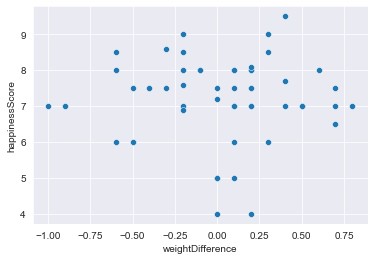

In [35]:
sns.scatterplot(data=trackData, x="weightDifference", y="happinessScore")

In [36]:
trackData[['happinessScore','weightDifference']].corr()

,happinessScore,weightDifference
happinessScore,1.000000,-0.004614
weightDifference,-0.004614,1.000000


Weight difference might look like a trivial column that just shows the difference of weight between 2 days.
But weight difference of each day usually comes from how much I ate that day.
If there was a strong positive correlation, it would mean I eat a lot when I am happy and vice versa.

I usually eat less when I am stressed so thought there could be a negative correlation but the score is too low to deduce anything.

Make new column that sums the number of pages I read for both books

In [41]:
trackData['pageReadTotal'] = trackData['pagesReadOne']+trackData['pagesReadTwo']

Run some correlation between number of pages read, mo and happiness, efficiencyscore

In [45]:
trackData['happinessScore'].corr(trackData['pageReadTotal'])

-0.12595258034983864

In [46]:
trackData['efficiencyScore'].corr(trackData['pageReadTotal'])

0.020024016509283663

In [47]:
trackData['happinessScore'].corr(trackData['mo'])

0.012382979332487259

In [48]:
trackData['efficiencyScore'].corr(trackData['mo'])

-0.1153886291594734

### New work to be done

1. Figure out how to make stats more continuous. A lot of the floats are in units of 0.5 which is convenient to store and record but is not the best to analyze.
2. Reconfigure data that would matter more and make a new tracker version so that it takes less time to record and can offer more data